### Importing Libraries

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Loading Dataset

In [2]:

path=os.listdir("Downloads/tumor/Training/")
classes={'no_tumor':0,'pituitary_tumor':1,'meningioma_tumor':2,'glioma_tumor':3}

In [3]:

X=[]
y=[]
for cls in classes:
    pth="Downloads/tumor/Training/"+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        #print(img.shape)
        img=cv2.resize(img,(200,200))# 0 is for lad the image in greyscale
        img=cv2.medianBlur(img,5)# to remove the nosisy in the image
        #img=cv2.convertScaleAbs(img,beta=25)#improve the brightness of the image beta=(0,100)
        X.append(img)
        y.append(classes[cls])
        #print(y[-1])

In [4]:
X=np.array(X)
y=np.array(y)

In [5]:
X_update=X.reshape(len(X),-1)

In [6]:
X_update.shape

(3359, 40000)

In [7]:
np.unique(y)

array([0, 1, 2, 3])

### MRI Image

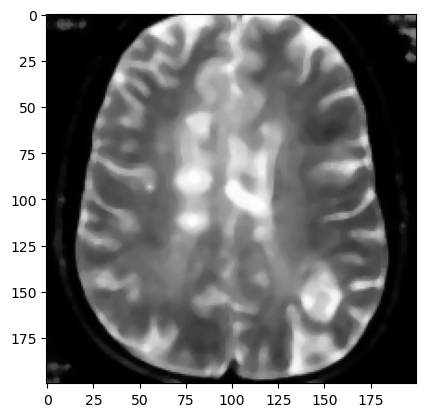

In [8]:
plt.imshow(X[7],cmap='gray')

In [11]:
 pd.Series(y).value_counts()

0    898
1    827
2    822
3    812
dtype: int64

In [11]:
# df=pd.DataFrame(X_update)
# y1=pd.DataFrame({'y':y})
# new_df=pd.concat([df, y1], axis=1)

### Train_test_split

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(X_update,y,random_state=12,test_size=0.20,stratify=y)

In [10]:
xtrain.shape, xtest.shape

((2687, 40000), (672, 40000))

In [11]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0


In [12]:
pd.DataFrame(ytest).value_counts()

0    180
1    166
2    164
3    162
dtype: int64

In [13]:
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

1.0 0.0
1.0 0.0


### Model Building

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [15]:


import warnings
warnings.filterwarnings('ignore')

In [16]:
lg=LogisticRegression(C=1)# c isa hyperparameter which is inversly proprtional to regulization which is to used to minimize the loss function

In [ ]:
lg.fit(xtrain,ytrain)

In [21]:
sv=SVC(kernel='linear',C=1,probability=True)

In [ ]:
sv.fit(xtrain,ytrain) 

In [22]:
print('accuray score when using Logistic Regression',lg.score(xtrain,ytrain))

accuray score when using Logistic Regression 0.9992556754745069


In [27]:
 print('accuray score when using SVM ',sv.score(xtrain,ytrain))

accuray score when using SVM  1.0


In [23]:
print('accuray score when using Logistic Regression',lg.score(xtest,ytest))
print('accuray score when using SVM ',sv.score(xtest,ytest))

accuray score when using Logistic Regression 0.8645833333333334
accuray score when using SVM  0.8883928571428571


### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
ypred=sv.predict(xtest)
confusion_matrix(ytest,ypred)

array([[163,   4,  12,   1],
       [  0, 161,   5,   0],
       [ 13,   9, 133,   9],
       [  7,   1,  14, 140]], dtype=int64)

### Testing Images

In [30]:
import cv2
X1=[]
y1=[]
for cls in classes:
    pth="Downloads/tumor/Testing/"+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))# 0 is for lad the image in greyscale
        img=cv2.medianBlur(img,3) 
        X1.append(img)
        y1.append(classes[cls])

In [31]:
X1=np.array(X1)
y1=np.array(y1)


In [32]:
X_update=X1.reshape(len(X1),-1)
X_update.shape

(525, 40000)

In [33]:
print(X_update.max())

255


In [34]:
X_update=X_update/255


In [35]:
lg.score(X_update,y1)

0.7657142857142857

In [36]:
X_update.max()

1.0

In [37]:
pd.DataFrame(y1).value_counts()

3    231
2    115
0    105
1     74
dtype: int64

In [38]:
sv.score(X_update,y1)

0.8419047619047619

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1,ypred)

array([[105,   0,   0,   0],
       [  7,  51,  14,   2],
       [ 10,   2, 103,   0],
       [ 11,   5,  32, 183]], dtype=int64)

In [20]:
import gradio as gr
import numpy as np

def classify_image(image):
    img=cv2.resize(image,(200,200))
    img=cv2.medianBlur(img,5)
    image=np.array(img)
    image=image.reshape(1,-1)
    #svprediction= sv.predict(image).tolist()
    lgprediction=lg.predict(image).tolist()
    classes={0:'no_tumor',1:'pituitary_tumor',2:'meningioma_tumor',3:'glioma_tumor'}
    probabilities = lg.predict_proba(image)[0]
    return {classes[i]: float(probabilities[i]) for i in range(len(probabilities))}

image_input = gr.inputs.Image(shape=(200, 200),image_mode='L', invert_colors=False,source='upload')
label_output = gr.outputs.Label()
sample_images=[["Downloads/tumor/Testing/no_tumor/image(8).jpg"],
              ["Downloads/tumor/Testing/pituitary_tumor/image(93).jpg"],
              ["Downloads/tumor/Testing/glioma_tumor/Te-gl_0075.jpg"],
               ["Downloads/tumor/Testing/glioma_tumor/Te-gl_0127.jpg"],
              ["Downloads/tumor/Testing/meningioma_tumor/image(121).jpg"]]
gr.Interface(fn=classify_image, inputs=image_input,outputs=label_output,examples=sample_images).launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://6dea1f69a79adba7fd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
